In [147]:
# Import modules, packages and dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Load the Data
raw_data = pd.read_csv("Country-data.csv")
raw_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


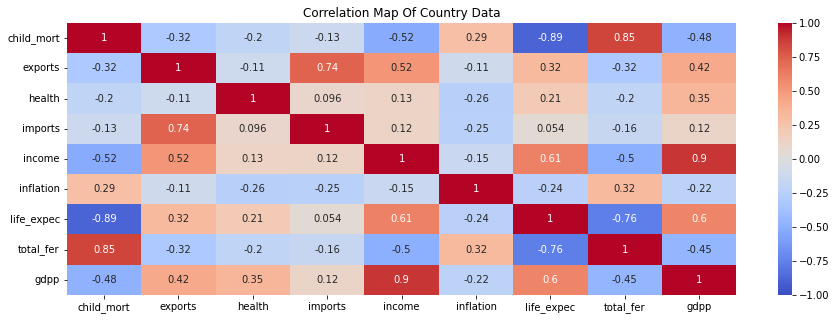

In [149]:
# Define the Clustering Target; by finding the features having high correlation between them
plt.figure(figsize=(15, 5))
sns.heatmap(raw_data.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
plt.title('Correlation Map Of Country Data');

In [150]:
# Based on the HeatMap, we are considering the following features for creating clusters:-
data = raw_data.loc[:,["income", "gdpp", "total_fer","life_expec","child_mort"]]

In [151]:
# Normalize the data 
scaler = StandardScaler()
transform_data = scaler.fit_transform(data)

In [165]:
# Define the epsilon and q value for DBSCAN algorithm
epsilon_value = 0.4
min_pts =5
dbscan = DBSCAN(eps = epsilon_value, min_samples = min_pts)
clusters = dbscan.fit_predict(transform_data)
data['dbscan_cluster'] = clusters
print('Cluster:',np.unique(clusters))
print('Clusters Size:',np.bincount(clusters + 1))

Cluster: [-1  0  1  2  3  4]
Clusters Size: [75 60 16  6  5  5]


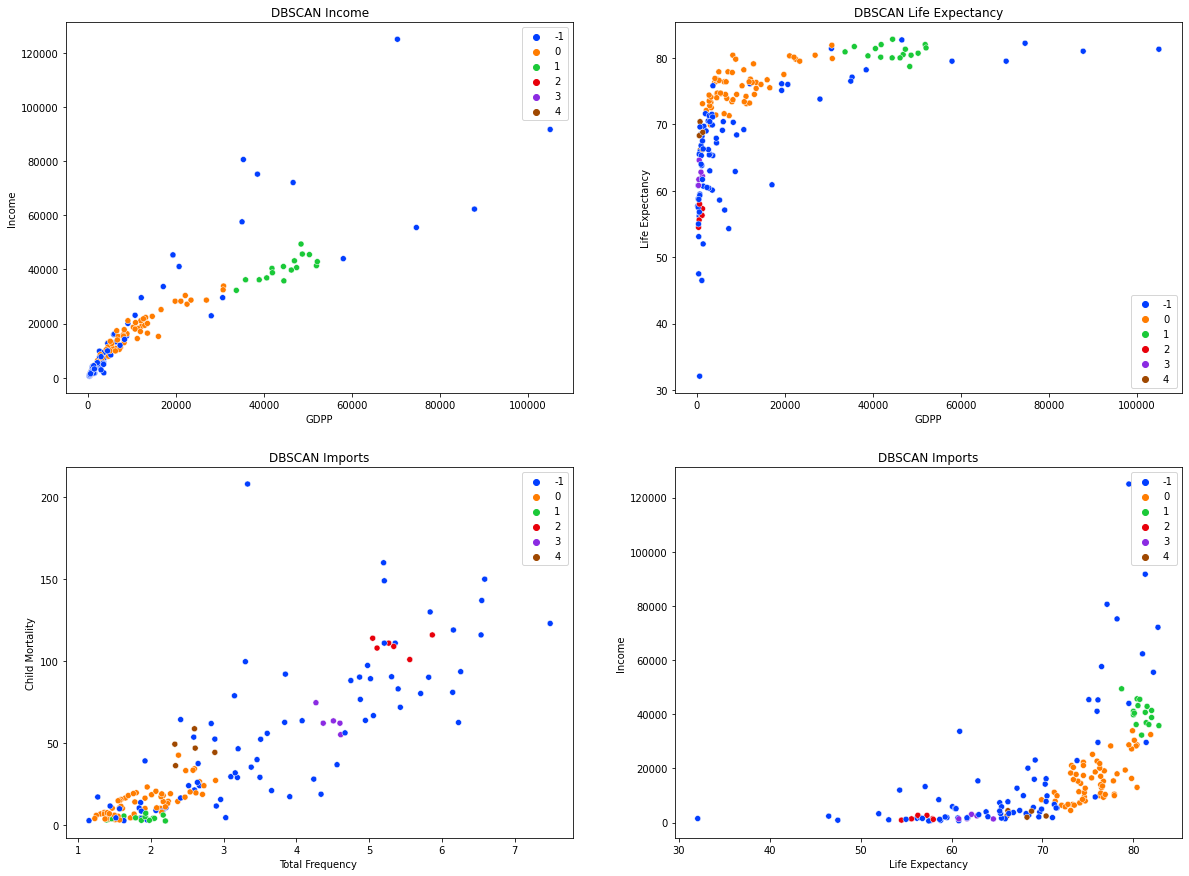

In [166]:
# Plot the Graph
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'income', data = data, hue = 'dbscan_cluster', palette = 'bright')
plt.legend(loc = "best")
plt.title('DBSCAN Income')
plt.xlabel('GDPP')
plt.ylabel('Income')

plt.subplot(2, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'life_expec', data = data, hue = 'dbscan_cluster', palette = 'bright')
plt.legend(loc = "best")
plt.title('DBSCAN Life Expectancy')
plt.xlabel('GDPP')
plt.ylabel('Life Expectancy')

plt.subplot(2, 2, 3)
sns.scatterplot(x = 'total_fer', y = 'child_mort', data = data, hue = 'dbscan_cluster', palette = 'bright')
plt.legend(loc = "best")
plt.title('DBSCAN Imports')
plt.xlabel('Total Frequency ')
plt.ylabel('Child Mortality')

plt.subplot(2, 2, 4)
sns.scatterplot(x = 'life_expec', y = 'income', data = data, hue = 'dbscan_cluster', palette = 'bright')
plt.legend(loc = "best")
plt.title('DBSCAN Imports')
plt.xlabel('Life Expectancy')
plt.ylabel('Income')

plt.show()

In [167]:
# Finding the cluster, to which the given countries, belong to
data['country'] = raw_data['country']
country_data = data.query('country=="United States"|country=="Australia"|country=="China"|country=="Germany"|country=="Cameroon"')[['country', 'dbscan_cluster']]
print(country_data)

           country  dbscan_cluster
7        Australia               1
28        Cameroon               2
34           China               0
58         Germany               1
159  United States               1
